## Network Flow

In [1]:
import sys
sys.path.insert(0, "..")

import sympy as sp
from algorithms.util2 import *
from algorithms.simplex_algorithms import *
from algorithms.util2 import print_model
from algorithms.network_flows import *

inf = sp.symbols("\\infty")


$m = |N|, n = |A|$

In [2]:
def max_criterion(array):
    max_val = -10000
    max_index = -1
    for i in range(len(array)):
        if 0 <= array[i] and max_val < array[i]:
            max_val = array[i]
            max_index = i
    return max_index

### Ejercicios hechos en clase

#### Ejemplo 1


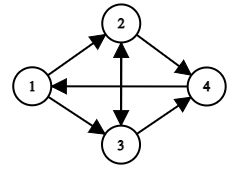

In [3]:
number_node = 4
edges: list[Edge] = [Edge(1, 2, 1),
                     Edge(1, 3, 1),
                     Edge(2, 3, 5),
                     Edge(2, 4, 5),
                     Edge(3, 2, 1),
                     Edge(3, 4, 5),
                     Edge(4, 1, 1),
                     Edge(4, np.Inf, 0)]  # (4, inf)
A = build_matrix(number_node, edges)
basic_var = [1, 2, 5, -1]
A[:, basic_var]

Matrix([
[ 1,  0,  0, 0],
[ 0,  1,  0, 0],
[-1, -1,  1, 0],
[ 0,  0, -1, 1]])

#### Ejemplo 2

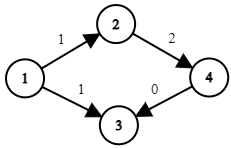

In [4]:
number_nodes = 4
edges = [Edge(1, 2, 1),
         Edge(1, 3, 1),
         Edge(2, 4, 2),
         Edge(4, 3, 0),
         Edge(4, np.Inf, 0)]  # (4, inf)

A = build_matrix(number_nodes, edges)
A

Matrix([
[ 1,  1,  0,  0, 0],
[-1,  0,  1,  0, 0],
[ 0, -1,  0, -1, 0],
[ 0,  0, -1,  1, 1]])

#### Ejemplo 3


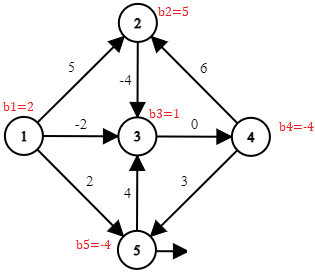

In [5]:
number_nodes = 5
edges: list[Edge] = [Edge(1, 2, 5),
                     Edge(1, 3, -2),
                     Edge(1, 5, 2),
                     Edge(2, 3, -4),
                     Edge(3, 4, 0),
                     Edge(4, 2, 6),
                     Edge(4, 5, 3),
                     Edge(5, 3, 4),
                     Edge(5, inf, 0)]

A = build_matrix(number_nodes, edges)
b = sp.Matrix([2, 5, 1, -4, -4])  # sum(b) = 0
c = sp.Matrix(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [6]:
print_model(A, b, c, "x", get_edges(edges, list(var)), ["="] * number_nodes, "min")


In [7]:
print("Matriz A")
display(A)
var = set(range(len(edges)))
basic_var = [2, 3, 4, 6, 8]
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
B = A[:, basic_var]
print(f"Matriz B")
display(B)
x_sol = B.inv() @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)


Matriz A


Matrix([
[ 1,  1,  1,  0,  0,  0,  0,  0, 0],
[-1,  0,  0,  1,  0, -1,  0,  0, 0],
[ 0, -1,  0, -1,  1,  0,  0, -1, 0],
[ 0,  0,  0,  0, -1,  1,  1,  0, 0],
[ 0,  0, -1,  0,  0,  0, -1,  1, 1]])

variables básicas
BI = [2, 3, 4, 6, 8]


Matriz B


Matrix([
[ 1,  0,  0,  0, 0],
[ 0,  1,  0,  0, 0],
[ 0, -1,  1,  0, 0],
[ 0,  0, -1,  1, 0],
[-1,  0,  0, -1, 1]])

Solución dual
$$\mathbf w^T  = \mathbf{c}_{BI}^T{B^{-1}}$$



In [8]:
w = c.row(basic_var).T @ B.inv()
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)


\begin{equation}
\mathbf{c}_{BI}^TB^{-1}N - \mathbf{c}_{NI}^T=\mathbf {w}^TN - \mathbf{c}_{NI}^T = z_{ij} - c_{ij} = w a_{ij} - c_{ij}
\end{equation}

Para el caso no básico (caso básico es 0) la expresión anterior en la optimalidad  puede expresarse como

\begin{align*}
w a_{ij} - c_{ij}\le 0\\
w (e_i - e_j) - c_{ij}\le 0\\
w_i - w_j - c_{ij}\le 0
\end{align*}

Donde $a_{ij}$ es la columna asociada a la arista a los nodos $i, j$. Para que sea óptimal todos los enlaces no básicos deben ser negativos 


In [9]:
non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
N = A[:, non_basic_var]
z = w @ N - c.row(non_basic_var).T
print_vector("costos no básicos", "w", z, non_basic_edges)

$w_{(1, 3)} = 1$ no es negativo, es nuestra nueva variable básica. Hallando el flujo en un circuito, sacamos aquella cuyo flujo es negativo. Por lo que nuestras nueva variables básicas son:

In [10]:
col = non_basic_var[max_criterion(z)]
print(f"Entra x[{col}]")


Entra x[1]


Sale el menor que está opuesto al flujo del que entra, arista $x_2=a_{(1, 5)}$

In [11]:
basic_var = [1, 3, 4, 6, 8]
basic_edges = get_edges(edges, basic_var)
B = A[:, basic_var]
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B")
display(B)
x_sol = B.inv() @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)


variables básicas
BI = [1, 3, 4, 6, 8]


Matriz B


Matrix([
[ 1,  0,  0,  0, 0],
[ 0,  1,  0,  0, 0],
[-1, -1,  1,  0, 0],
[ 0,  0, -1,  1, 0],
[ 0,  0,  0, -1, 1]])

Calculando $w a_{ij} - c_{ij}$ o en su forma matricial $\mathbf w^T N - c_{NI}^T$ y seleccionando el más positivo para que sea la nueva variable básica. Termina cuando todos son negativos.

In [12]:
w = c.row(basic_var).T @ B.inv()
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c.row(non_basic_var).T
print_vector("costos no básicos", "w", z, non_basic_edges)


#### Ejemplo 4


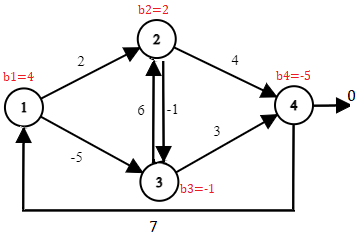

In [13]:
number_nodes = 4
edges: list[Edge] = [Edge(1, 2, 2),
                     Edge(1, 3, -5),
                     Edge(2, 3, -1),
                     Edge(2, 4, 4),
                     Edge(3, 2, 6),
                     Edge(3, 4, 3),
                     Edge(4, 1, 7),
                     Edge(4, inf, 0)]

A = build_matrix(number_nodes, edges)
b = sp.Matrix([4, 2, -1, -5])  # sum(b) = 0
c = sp.Matrix(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [14]:
basic_var = [0, 2, 3, 7]
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T)
print_vector("costos no básicos", "w", z, non_basic_edges)

variables básicas
BI = [0, 2, 3, 7]
Matriz B


In [15]:
# Puedo elegir cualquier arista positiva pero elijo la arista mas positiva, segunda arista
col = 1  # hallado gráficamente
# Calculando el flujo circular a favor de la nueva arista sale dos que estan en contra aplico el test de minimo ratio
row = 1  # hallado gráficamente
basic_var[row] = col
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w_T)
# aún no es negativo, lo cambiamos
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [0, 1, 3, 7]
Matriz B


In [16]:
col = 5
row = 0 # hallado gráficamente 
basic_var[row] = col
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T)
# aún no es negativo, lo cambiamos
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [5, 1, 3, 7]
Matriz B


In [17]:
col = 2  # entra, hallado gráficamente
row = 2  # sale, hallado gráficamente
basic_var[row] = col
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T)
# todos negativos, se llegó al óptimo
print_vector("costos no básicos", "w", z, non_basic_edges)

variables básicas
BI = [5, 1, 2, 7]
Matriz B


Óptimo

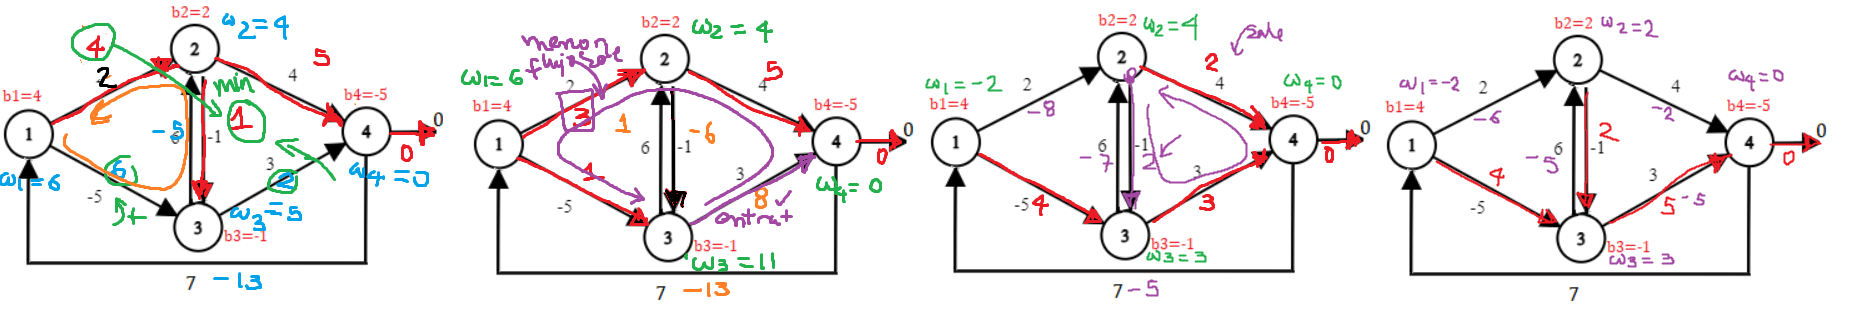

### Examen final 2021-II

#### 1. Resolver el siguiente problema de flujo en red de costo mínimo con valores $b_i$ en los nodos y valores $c_{ij}$ en los arcos. (Utilizando la teoría de grafos y árboles). (8 ptos)

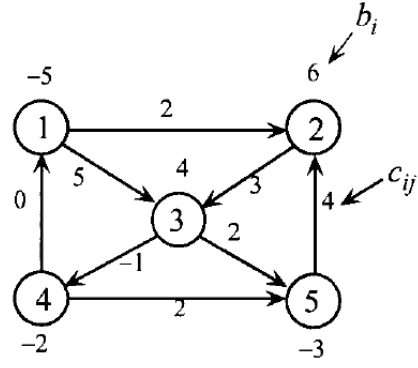

In [18]:
number_nodes = 5
edges: list[Edge] = [Edge(1, 3, 5),
                     Edge(1, 2, 2),
                     Edge(2, 3, 3),
                     Edge(3, 4, -1),
                     Edge(3, 5, 2),
                     Edge(4, 1, 0),
                     Edge(4, 5, 2),
                     Edge(5, 2, 4),
                     Edge(5, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = sp.Matrix([-5, 6, 4, -2, -3])  # sum(b) = 0
c = sp.Matrix(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [19]:
basic_var = [5, 2, 3, 6, 8]
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T)
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [5, 2, 3, 6, 8]
Matriz B


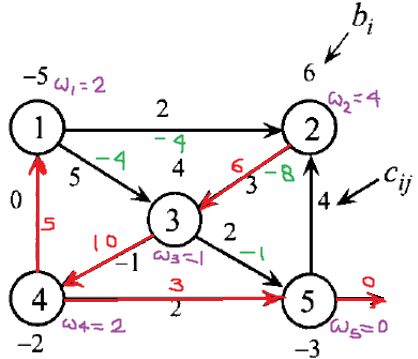

Óptimo